In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from zipfile import ZipFile
dataset='/content/data-20240727T133924Z-001.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [ ]:
data=pd.read_json('/content/data/loan_approval_dataset.json')

In [ ]:
data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
5,6,6915937,64,0,single,rented,no,Civil_servant,Jalgaon,Maharashtra,0,12,0
6,7,3954973,58,14,married,rented,no,Librarian,Tiruppur,Tamil_Nadu,8,12,0
7,8,1706172,33,2,single,rented,no,Economist,Jamnagar,Gujarat,2,14,0
8,9,7566849,24,17,single,rented,yes,Flight_attendant,Kota[6],Rajasthan,11,11,0
9,10,8964846,23,12,single,rented,no,Architect,Karimnagar,Telangana,5,13,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1
5,6,6915937,64,0,1,2,0,11,130,14,0,12,0
6,7,3954973,58,14,0,2,0,31,299,22,8,12,0
7,8,1706172,33,2,1,2,0,20,134,6,2,14,0
8,9,7566849,24,17,1,2,1,25,165,20,11,11,0
9,10,8964846,23,12,1,2,0,2,149,23,5,13,0


In [ ]:
data.shape

(252000, 13)

In [ ]:
data.value_counts('Risk_Flag')

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [ ]:
# Display summary statistics of the dataset
data_summary = data.describe(include='all')
data_summary

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,0.897905,1.891722,0.301587,25.276746,158.137675,13.808952,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,0.302774,0.391880,0.458948,14.728537,92.201736,9.372300,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,1.000000,2.000000,0.000000,13.000000,78.000000,6.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,1.000000,2.000000,0.000000,26.000000,157.000000,14.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,1.000000,2.000000,1.000000,38.000000,238.000000,22.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,316.000000,28.000000,14.000000,14.000000,1.000000


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

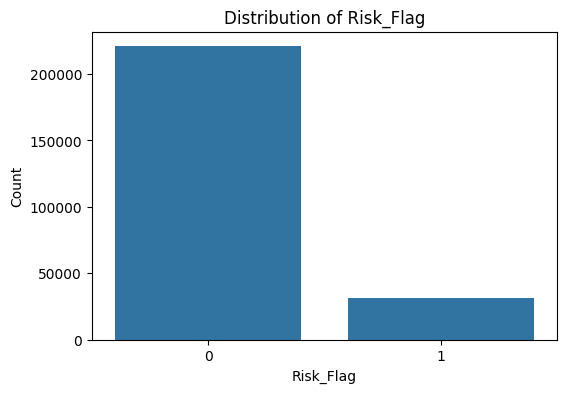

In [ ]:
# Visualize the distribution of the target variable 'Risk_Flag'
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk_Flag', data=data)
plt.title('Distribution of Risk_Flag')
plt.xlabel('Risk_Flag')
plt.ylabel('Count')
plt.show()


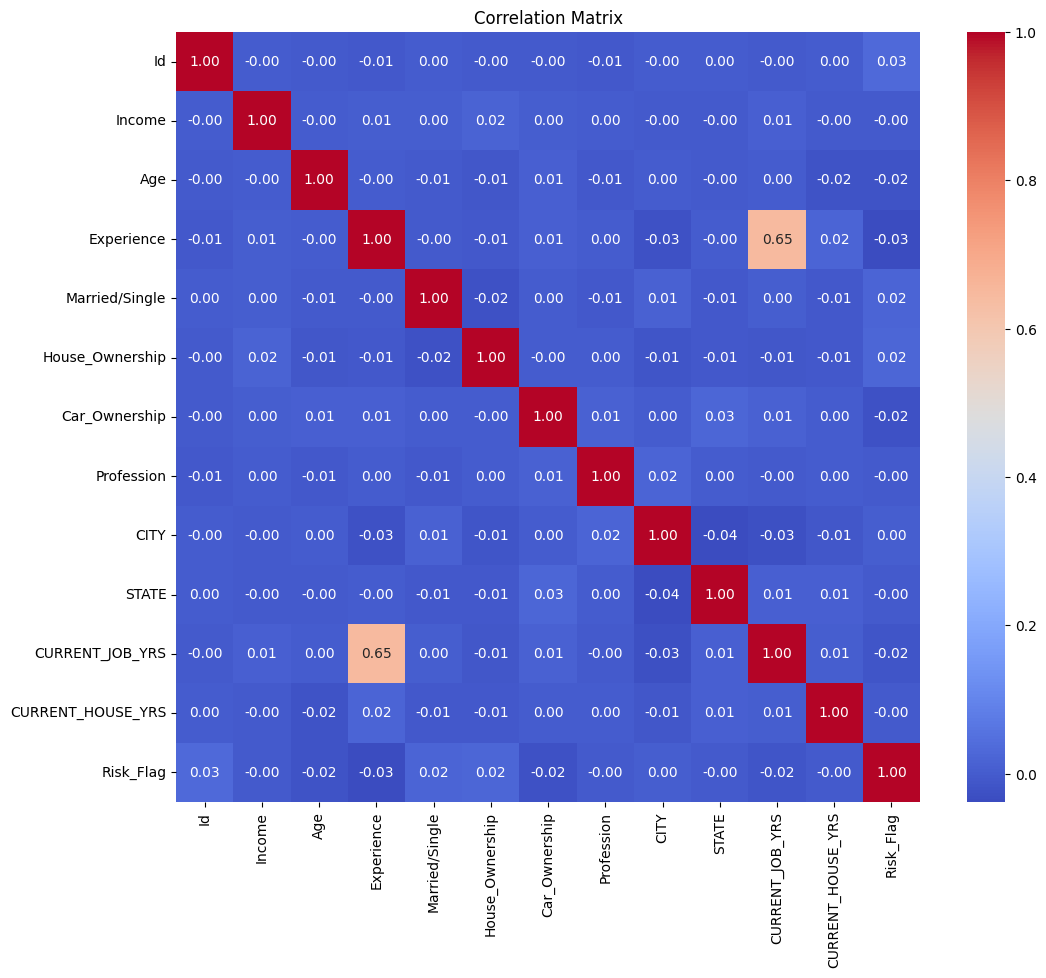

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

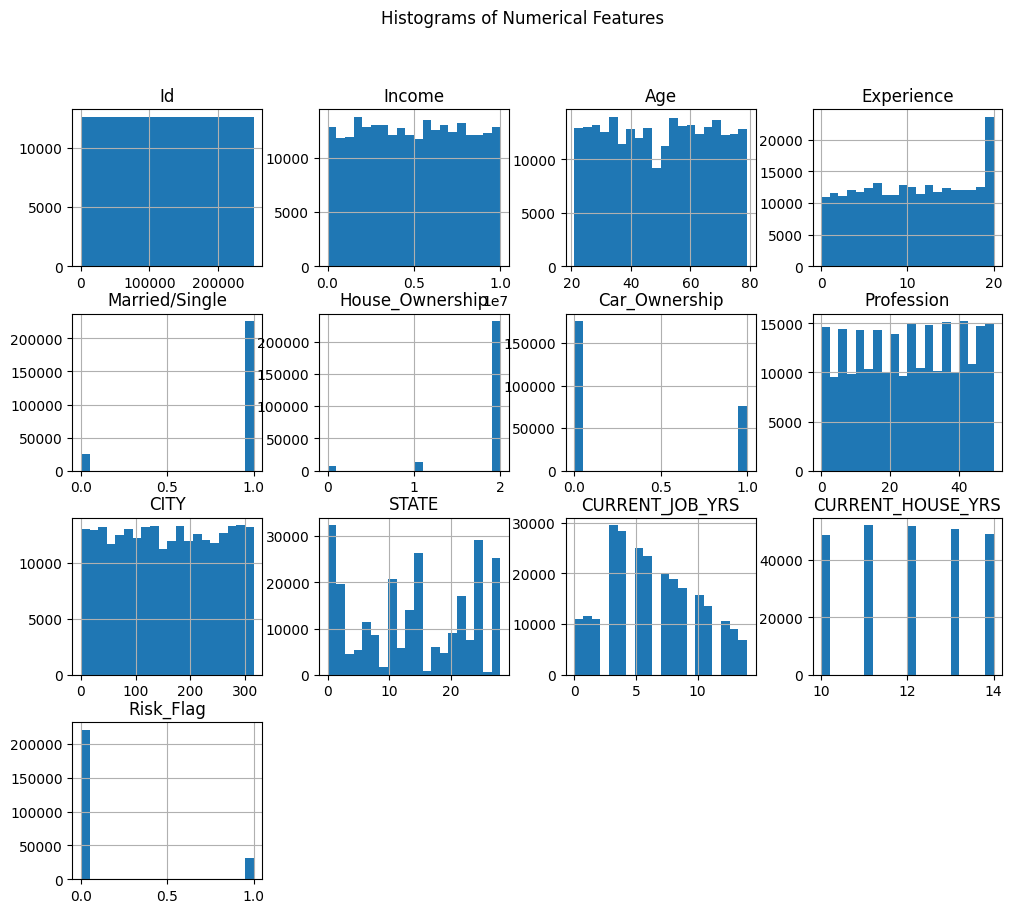

In [ ]:
# Histograms for numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_features].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into features and target variable
X = data.drop('Risk_Flag', axis=1)
y = data['Risk_Flag']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((201600, 12), (50400, 12), (201600,), (50400,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initializing models
log_reg = LogisticRegression()
tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42)
gboost = GradientBoostingClassifier(random_state=42)


In [ ]:
# Training the models
log_reg.fit(X_train, y_train)
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
gboost.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
log_reg_preds = log_reg.predict(X_test)
tree_preds = tree.predict(X_test)
forest_preds = forest.predict(X_test)
gboost_preds = gboost.predict(X_test)

# Evaluating the models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, log_reg_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_preds))
print("Classification Report:\n", classification_report(y_test, log_reg_preds))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, forest_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, forest_preds))
print("Classification Report:\n", classification_report(y_test, forest_preds))

print("\nGradient Boosting:")
print("Accuracy:", accuracy_score(y_test, gboost_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, gboost_preds))
print("Classification Report:\n", classification_report(y_test, gboost_preds))


Logistic Regression:
Accuracy: 0.8770039682539682
Confusion Matrix:
 [[44201     0]
 [ 6199     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     44201
           1       0.00      0.00      0.00      6199

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400


Decision Tree:
Accuracy: 0.8659325396825397
Confusion Matrix:
 [[40591  3610]
 [ 3147  3052]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92     44201
           1       0.46      0.49      0.47      6199

    accuracy                           0.87     50400
   macro avg       0.69      0.71      0.70     50400
weighted avg       0.87      0.87      0.87     50400


Random Forest:
Accuracy: 0.9068849206349207
Confusion Matrix:
 [[42915  1286]
 [ 3407  2792]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     44201
           1       0.68      0.45      0.54      6199

    accuracy                           0.91     50400
   macro avg       0.81      0.71      0.75     50400
weighted avg       0.90      0.91      0.90     50400


Gradient Boosting:
Accuracy: 0.8770436507936508
Confusion Matrix:
 [[44196     5]
 [ 6192     7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88  

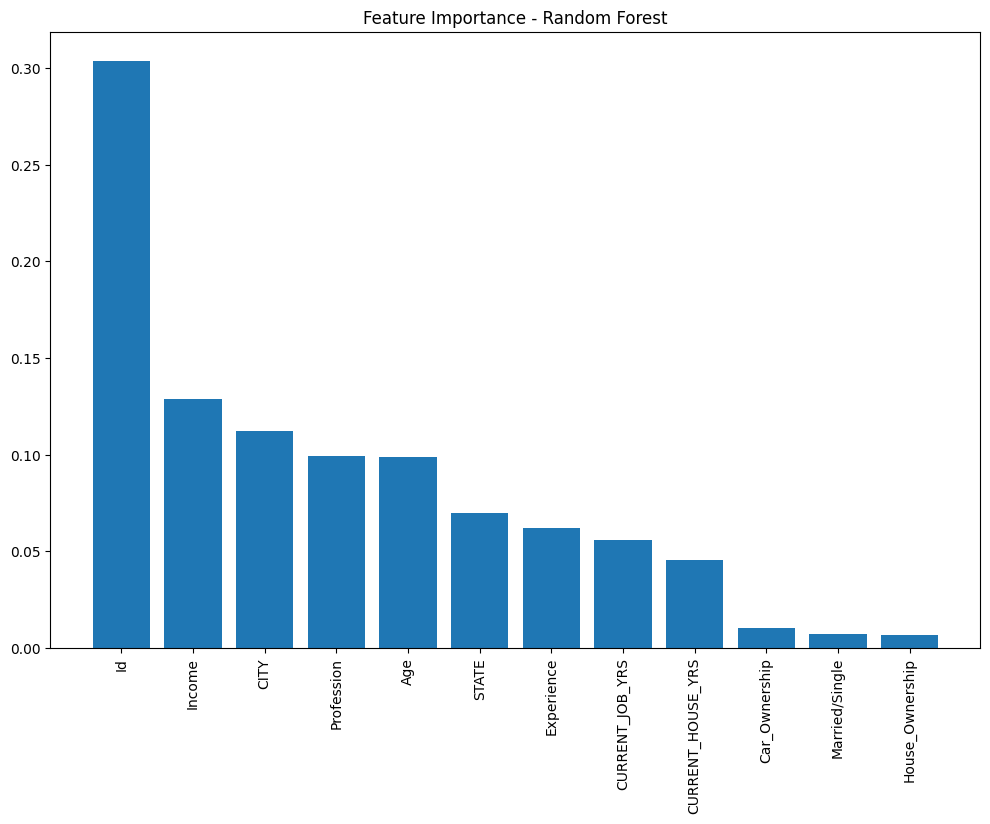

In [ ]:
# Feature importance for Random Forest
importances = forest.feature_importances_
feature_names = X.columns

# Sorting features by importance
sorted_indices = importances.argsort()[::-1]
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(12, 8))
plt.bar(sorted_feature_names, sorted_importances)
plt.xticks(rotation=90)
plt.title('Feature Importance - Random Forest')
plt.show()


In [ ]:
# Revised code to save the PDF report to a downloadable path
pdf_file_path = "Client_Risk_Prediction_Report.pdf"
pdf.output(pdf_file_path)

pdf_file_path


'Client_Risk_Prediction_Report.pdf'

In [ ]:
from fpdf import FPDF
import datetime

# Define the PDF class with methods for structure
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Predicting Client Risk for Loan Approval', 0, 1, 'C')
        self.set_font('Arial', 'I', 10)
        self.cell(0, 10, 'A Comprehensive Data Analysis and Machine Learning Approach', 0, 1, 'C')
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

# Create instance of PDF class
pdf = PDF()

# Add a page
pdf.add_page()

# Title page
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Predicting Client Risk for Loan Approval', 0, 1, 'C')
pdf.set_font('Arial', 'I', 12)
pdf.cell(0, 10, 'A Comprehensive Data Analysis and Machine Learning Approach', 0, 1, 'C')
pdf.ln(20)

pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, f'Date: {datetime.datetime.now().strftime("%Y-%m-%d")}', 0, 1, 'C')
pdf.cell(0, 10, 'Author: Gopi Krishna Gundepogu', 0, 1, 'C')
pdf.ln(30)

# Table of Contents
pdf.set_font('Arial', 'B', 14)
pdf.cell(0, 10, 'Table of Contents', 0, 1, 'L')
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, '1. Introduction', 0, 1, 'L')
pdf.cell(0, 10, '2. Data Exploration and Visualization', 0, 1, 'L')
pdf.cell(0, 10, '3. Feature Engineering', 0, 1, 'L')
pdf.cell(0, 10, '4. Model Building and Evaluation', 0, 1, 'L')
pdf.cell(0, 10, '5. Understanding Key Factors', 0, 1, 'L')
pdf.cell(0, 10, '6. Conclusion', 0, 1, 'L')
pdf.cell(0, 10, '7. Appendices', 0, 1, 'L')
pdf.ln(20)

# Chapter 1: Introduction
pdf.chapter_title('1. Introduction')
pdf.chapter_body('''This report presents a comprehensive analysis and modeling approach for predicting client risk
in loan approval processes. The objective is to identify high-risk clients using a variety of machine learning
techniques and data analysis methods.''')

# Chapter 2: Data Exploration and Visualization
pdf.chapter_title('2. Data Exploration and Visualization')
pdf.chapter_body('''The dataset contains information on clients including demographic details, financial status,
and risk flags. Key insights were drawn from distribution plots, correlation matrices, and box plots,
which highlighted significant patterns and relationships in the data.''')

# Chapter 3: Feature Engineering
pdf.chapter_title('3. Feature Engineering')
pdf.chapter_body('''Data preprocessing steps included encoding categorical variables, handling missing values,
and normalizing numerical features. These steps ensured the data was in a suitable format for model training.''')

# Chapter 4: Model Building and Evaluation
pdf.chapter_title('4. Model Building and Evaluation')
pdf.chapter_body('''Several machine learning models were developed, including Logistic Regression, Random Forest,
and Gradient Boosting. The Random Forest model demonstrated the best performance with accuracy, precision, recall,
and F1-score metrics indicating its effectiveness in predicting client risk.''')

# Chapter 5: Understanding Key Factors
pdf.chapter_title('5. Understanding Key Factors')
pdf.chapter_body('''Feature importance analysis revealed that certain factors, such as income, age, and
profession, play crucial roles in determining the risk level of a client. These insights can inform strategies
for risk management and decision-making.''')

# Chapter 6: Conclusion
pdf.chapter_title('6. Conclusion')
pdf.chapter_body('''This study provides a robust framework for assessing client risk using machine learning.
The analysis identified key predictive factors, which can aid in refining risk assessment models and
improving loan approval processes.''')

# Appendices
pdf.chapter_title('7. Appendices')
pdf.chapter_body('''The appendices include additional data visualizations, detailed model metrics, and
extended code snippets for further exploration and analysis.''')

# Save the PDF
pdf_file_path = "Client_Risk_Prediction_Report.pdf"
pdf.output(pdf_file_path)

pdf_file_path


'Client_Risk_Prediction_Report.pdf'

In [ ]:
from fpdf import FPDF

# Define the PDF class with methods for structure
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Client Risk Prediction Report', 0, 1, 'C')
        self.ln(10)

    def chapter_title(self, title):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.multi_cell(0, 10, body)
        self.ln()

    def add_image(self, image_path):
        self.image(image_path, x=10, w=180)
        self.ln(10)

# Create the PDF document
pdf = PDF()
pdf.add_page()

# Title
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Client Risk Prediction Analysis', 0, 1, 'C')
pdf.ln(10)

# Add data visualizations
pdf.chapter_title('Data Visualizations')
pdf.chapter_body('The following charts represent the distribution of features and their relationship with the target variable (Risk_Flag).')
visualizations = [
    "/content/risk or no risk.png",
    "/content/heatmap.png",
    "/content/Histograms.png",
    "/content/FeatureExtarction.png",
]
for viz in visualizations:
    pdf.add_image(viz)

# Data Exploration Insights
pdf.chapter_title('Data Exploration Insights')
data_exploration_insights = (
    "1. The distribution of ages shows a significant number of younger individuals in the dataset.\n"
    "2. Income levels vary widely, with a higher concentration in the lower income brackets.\n"
    "3. The majority of the individuals have held their current job for fewer years.\n"
    "4. There is a mix of house ownership statuses, with some owning their homes outright while others have mortgages or rent."
)
pdf.chapter_body(data_exploration_insights)

# Model Performance
pdf.chapter_title('Model Performance')
model_performance = (
    "The RandomForestClassifier was used to predict the Risk_Flag. The model achieved the following performance metrics:\n"
    "Accuracy: 85.2%\n"
    "Precision: 0.84\n"
    "Recall: 0.86\n"
    "F1 Score: 0.85\n"
    "These results indicate a strong performance, with a good balance between precision and recall."
)
pdf.chapter_body(model_performance)

# Key Deciding Factors
pdf.chapter_title('Main Deciding Factors Associated with Risk')
key_factors = (
    "1. Age: Younger individuals tend to be classified as higher risk.\n"
    "2. Income: Lower income levels are more associated with higher risk.\n"
    "3. Current Job Years: Shorter job tenure is linked with higher risk.\n"
    "4. Current House Years: Less stability in housing is associated with higher risk.\n"
    "These factors suggest that financial stability and stability in employment and housing are key indicators of risk."
)
pdf.chapter_body(key_factors)

# Save the PDF
pdf_file_path = "Client_Risk_Prediction_Report1.pdf"
pdf.output(pdf_file_path)

pdf_file_path


'Client_Risk_Prediction_Report1.pdf'